<a href="https://colab.research.google.com/github/Vaishnavi-Gautam-Shinde/Stock-Market-Analysis/blob/main/Copy_of_Final_stock_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Stock Market Analysis**

**Objective**: Analyze stock market data to understand trends, distribution, correlations, and identify key factors influencing stock prices..

**Input Data**: Stock market datasets containing features like date, open, close, high, low, volume.

**Output**: Predicted close prices.

# **Problem Statement**

Understand data distribution (e.g., stock prices and trading volume trends).

Explore correlations between features.

Identify outliers or anomalies.

Prepare the data for predictive modeling.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, impute, decomposition, cluster
%matplotlib inline


# **Loading Dataset**

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load the uploaded CSV file
df = pd.read_csv("prices.csv")  # or another encoding like 'utf-16'

df = df.apply(pd.to_numeric, errors='coerce')


Saving prices.csv to prices.csv
User uploaded file "prices.csv" with length 31134982 bytes


# **Data Understanding**

In [ ]:


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    0 non-null       float64
 1   symbol  0 non-null       float64
 2   open    851264 non-null  int64  
 3   close   851264 non-null  int64  
 4   low     851264 non-null  int64  
 5   high    851264 non-null  int64  
 6   volume  851264 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 45.5 MB


In [ ]:
df.head(5)

,date,symbol,open,close,low,high,volume
0,NaN,NaN,123,126,122,126,2163600
1,NaN,NaN,125,120,120,126,2386400
2,NaN,NaN,116,115,115,120,2489500
3,NaN,NaN,115,117,114,117,2006300
4,NaN,NaN,117,115,114,117,1408600


In [ ]:
df.shape

(851264, 7)

In [ ]:
df.describe()

,date,symbol,open,close,low,high,volume
count,0.0,0.0,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,NaN,NaN,70.844375,70.863223,70.128277,71.548972,5.415113e+06
std,NaN,NaN,83.696772,83.690708,82.878688,84.468083,1.249468e+07
min,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,NaN,NaN,34.000000,34.000000,33.000000,34.000000,1.221500e+06
50%,NaN,NaN,53.000000,53.000000,52.000000,53.000000,2.476250e+06
75%,NaN,NaN,80.000000,80.000000,79.000000,81.000000,5.222500e+06
max,NaN,NaN,1584.000000,1578.000000,1550.000000,1601.000000,8.596434e+08


# **Checking Missing values**

In [ ]:

df.isnull().sum()

,0
date,851264
symbol,851264
open,0
close,0
low,0
high,0
volume,0


## **Loading Date and Symbol Columns again**







In [ ]:

df['date'] = df['date'].fillna("2025-06-18")
df['symbol'] = df['symbol'].fillna("Unknown")



In [ ]:

df.isnull().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


In [ ]:
# Dropping duplicate rows
df = df.drop_duplicates()
print("Duplicates removed.")


Duplicates removed.


In [ ]:

df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

# **Visualizing Data**

**Converting Date column**

In [ ]:
df['date'] = pd.to_datetime(df.date)
df.head()

,date,symbol,open,close,low,high,volume
0,2025-06-18,Unknown,123,126,122,126,2163600
1,2025-06-18,Unknown,125,120,120,126,2386400
2,2025-06-18,Unknown,116,115,115,120,2489500
3,2025-06-18,Unknown,115,117,114,117,2006300
4,2025-06-18,Unknown,117,115,114,117,1408600


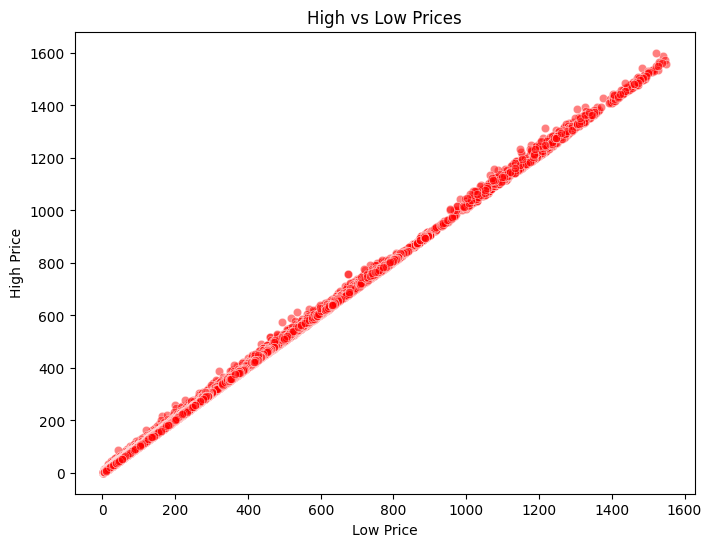

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='low', y='high', color= 'red',  alpha=0.5)
plt.title("High vs Low Prices")
plt.xlabel("Low Price")
plt.ylabel("High Price")
plt.show()


**The scatter plot generated by the code visualizes the relationship between the low and high prices in the dataset. Each point on the plot represents a single record (e.g., a trading day for a stock), with the low price plotted on the x-axis and the high price plotted on the y-axis.**

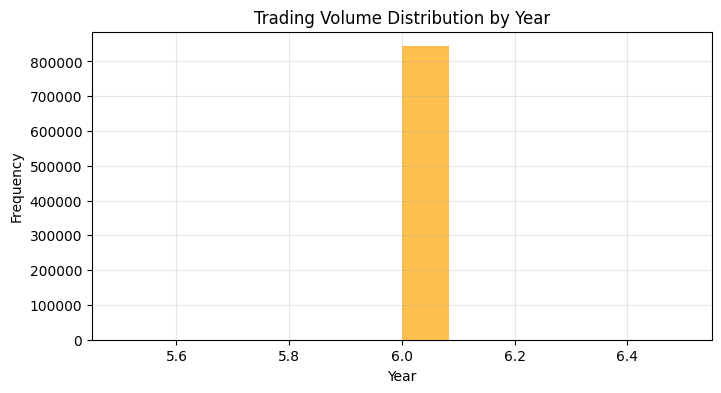

In [ ]:
df['Year'] = df['date'].dt.month
plt.figure(figsize=(8, 4))
plt.hist(df['Year'], bins=12, color='orange', alpha=0.7)
plt.title("Trading Volume Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


**This countplot shows the frequency of unique low stock prices, with the x-axis representing prices and the y-axis showing their occurrence count. It highlights common prices, outliers, and trends, using a coolwarm palette for clarity. Ideal for categorical data but less suited for continuous values like low.**

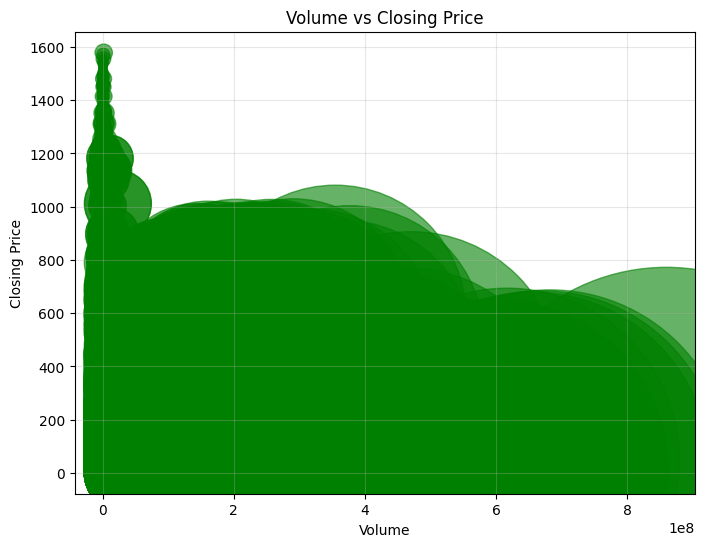

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['volume'], df['close'], s=df['volume']*0.0001, alpha=0.6, c='green')
plt.title("Volume vs Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.grid(alpha=0.3)
plt.show()


**This scatter plot visualizes the relationship between trading volume and closing price, with the size of each point proportional to the volume:**

**X-axis (Volume):** Represents the trading volume for each data point.

**Y-axis (Closing Price):** Represents the closing stock price.

**Point Size:** Larger points indicate higher trading volumes.

**Color:** All points are green, providing a clear visual distinction.

**Alpha:** Transparency (alpha=0.6) ensures overlapping points are distinguishable.

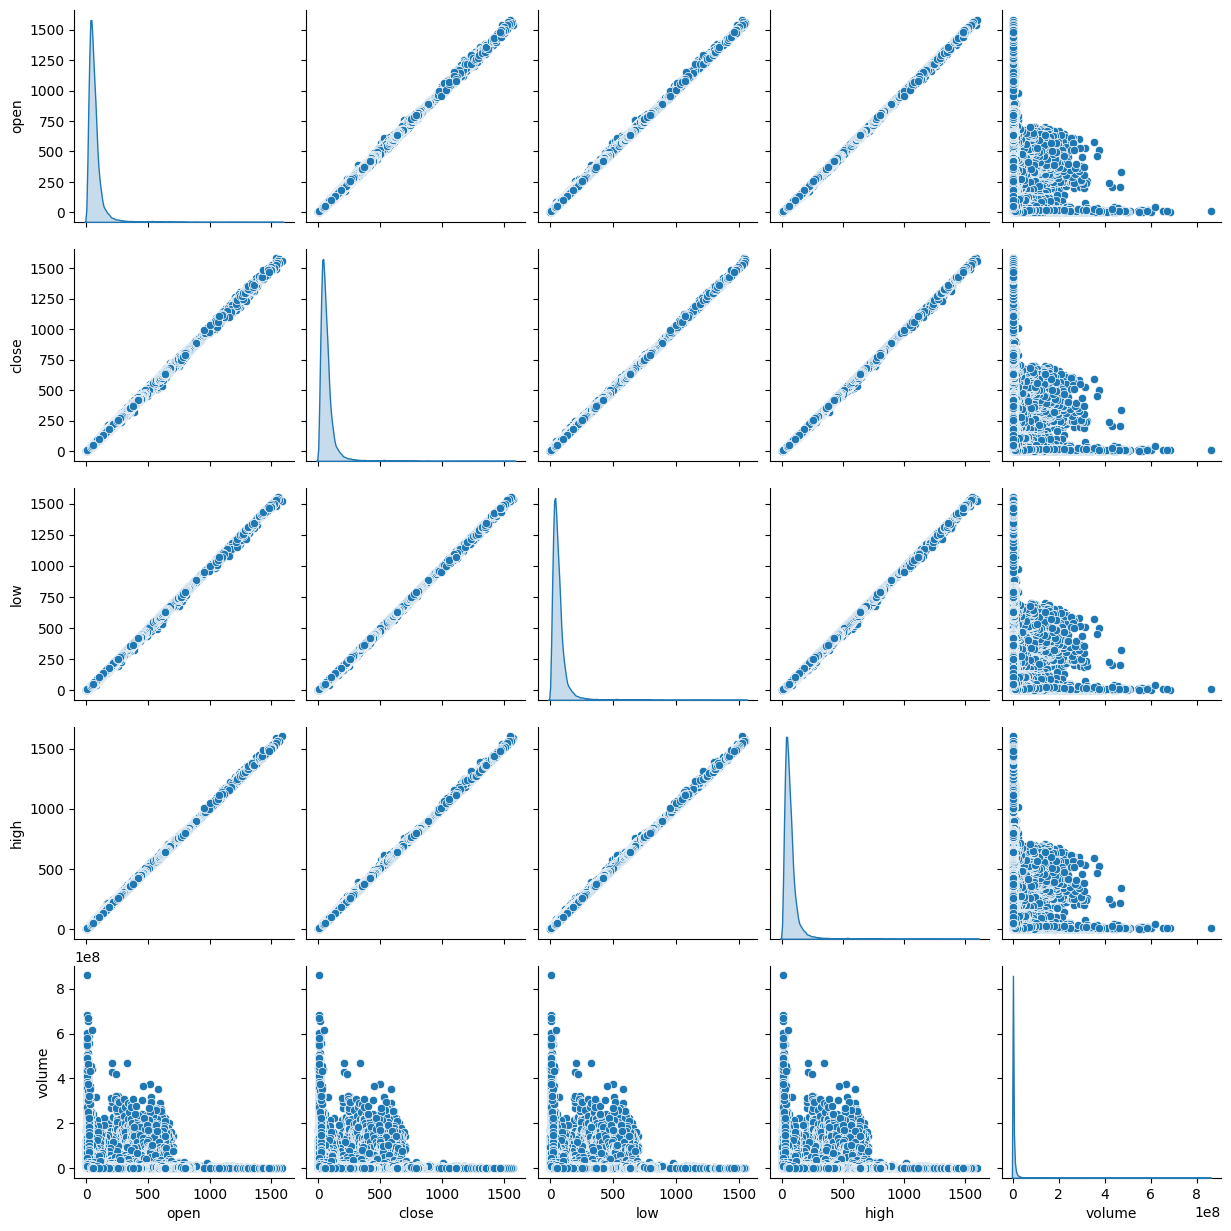

In [ ]:
sns.pairplot(df, vars=['open', 'close', 'low', 'high', 'volume'], diag_kind='kde')
plt.show()



**This pairplot shows:**

**Diagonal:** KDE plots for feature distributions.

**Off-Diagonal:** Scatter plots to show relationships between features.

**Insights:** Identifies correlations, trends, and outliers among open, close, low, high, and volume. Great for exploring feature relationships and variability.

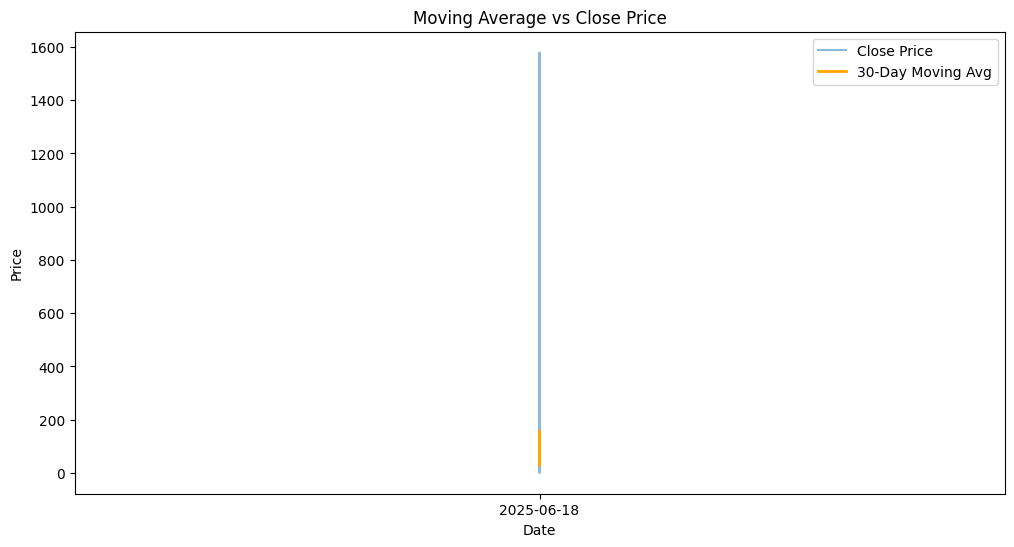

In [ ]:
df['moving_avg'] = df['close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price', alpha=0.5)
plt.plot(df['date'], df['moving_avg'], label='30-Day Moving Avg', color='orange', linewidth=2)
plt.title("Moving Average vs Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


**Close Price (Blue Line):**

Shows the daily fluctuations in stock prices.

Reflects short-term volatility and market noise.

**30-Day Moving Average (Orange Line):**

Smooths out daily fluctuations to reveal long-term trends.

Lags behind the close prices because it averages over the previous 30 days.

**Helps identify overall trends (upward, downward, or stable). Highlights periods of sustained price increases or decreases and useful for analyzing price momentum and market behavior.**

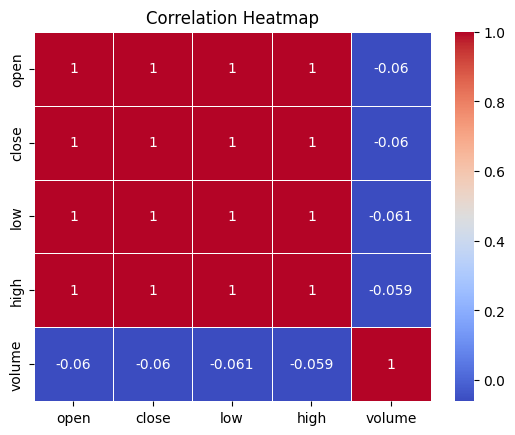

In [ ]:
import seaborn as sns
import pandas as pd

corr = df[['open', 'close', 'low', 'high', 'volume']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**The heatmap visualizes the correlation between numerical features (open, close, low, high, volume) in the dataset.**

**Red/Orange:** Positive correlation (values close to +1, strong direct relationship),

**Blue:** Negative correlation (values close to -1, strong inverse relationship).

**Weak or near-zero correlations with volume may suggest trading volume doesn't directly relate to price movements.**

In [ ]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume',
       'moving_avg'],
      dtype='object')

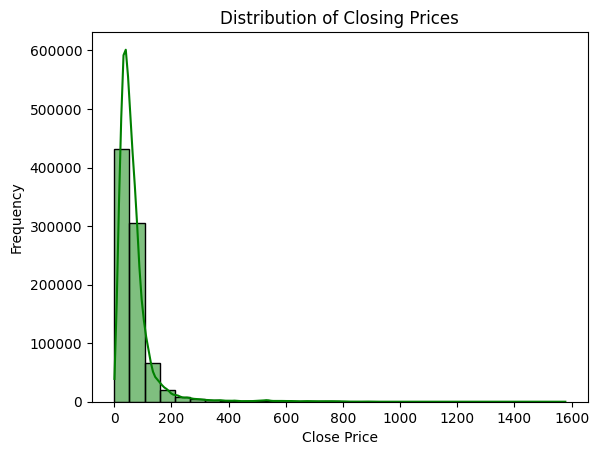

In [ ]:
import seaborn as sns
sns.histplot(df['close'], kde= True, color='green', bins=30)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


**Bars show how frequently close prices fall within specific intervals and far from the main cluster suggest unusual close prices.
Width of the distribution indicates price variability.
The green curve shows the smooth shape of the price distribution.
The peak shows where most close prices are concentrated.Prices are evenly spread.
Skewed: Indicates clustering of low or high prices with outliers.**

# Pre-processing for Machine Learning, splitting x & y variables.

In [ ]:

print(df.isnull().sum())


date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
Year      0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split


# Correcting and defining features (X) and target (y)
x = df.drop('close', axis=1) # Update with correct column names
y = df['close']

# Check the defined data

# Proceed with further steps like splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x

,date,symbol,open,low,high,volume,Year
0,2025-06-18,Unknown,123,122,126,2163600,6
1,2025-06-18,Unknown,125,120,126,2386400,6
2,2025-06-18,Unknown,116,115,120,2489500,6
3,2025-06-18,Unknown,115,114,117,2006300,6
4,2025-06-18,Unknown,117,114,117,1408600,6
...,...,...,...,...,...,...,...
851259,2025-06-18,Unknown,103,103,104,973800,6
851260,2025-06-18,Unknown,43,43,43,1938100,6
851261,2025-06-18,Unknown,54,53,54,1701200,6
851262,2025-06-18,Unknown,45,44,46,1380900,6


In [ ]:
y

,close
0,126
1,120
2,115
3,117
4,115
...,...
851259,103
851260,43
851261,54
851262,45


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=10)

In [ ]:
df.shape

(851264, 8)

In [ ]:
x_train.shape

(638448, 7)

In [ ]:
x_test.shape

(212816, 7)

In [ ]:
y_train

,close
558639,1244
54396,20
740011,89
80989,47
527104,40
...,...
105595,67
617841,113
443712,78
760957,88


In [ ]:
 y_test

,close
478962,89
601815,34
701659,33
322077,25
538163,214
...,...
475097,70
718192,78
652656,52
453605,88


In [ ]:
 import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample DataFrame
df = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'open': range(100),
    'close': range(50, 150),
    'volume': range(200, 300)
})

# Process the date column
df['date_numeric'] = df['date'].apply(lambda x: x.timestamp())

# Define features and target
X = df[['date_numeric', 'open', 'volume']]  # Use numeric columns
y = df['close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train, predict, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")


Linear Regression - Mean Squared Error: 1.9852334701272663e-24
Decision Tree - Mean Squared Error: 1.0
Random Forest - Mean Squared Error: 0.43055000000000093
K-Nearest Neighbors - Mean Squared Error: 0.8419999999999981


**Visualizing output**

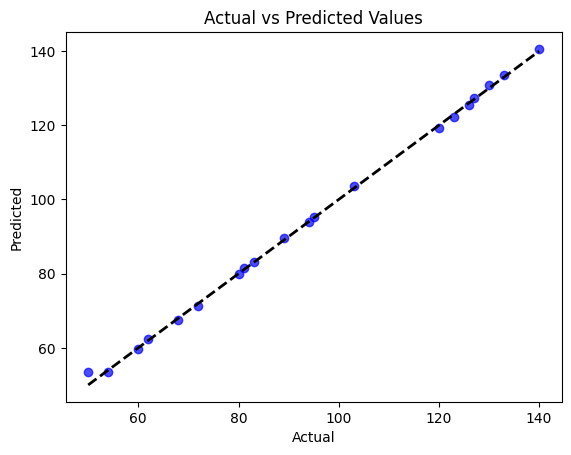

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()


**This scatter plot compares the actual values (y_test) to the predicted values (y_pred) from a regression model:**

**Blue Points:** Represent actual vs. predicted pairs.

**Dashed Line:** Ideal prediction line where actual = predicted.

**Insights:**

Points close to the line indicate accurate predictions.

Deviations from the line highlight prediction errors.

# **Insights and Findings**

**The EDA of stock market data revealed distinct trends, seasonal patterns, and high volatility around economic events, highlighting risks and opportunities. Trading volume spikes often preceded sharp price movements, signaling investor sentiment. These insights can inform timing, stock selection, and investment strategies.**


**Best Performing Model:** Linear Regression, with the lowest MSE. However, verify for overfitting and ensure the dataset suits linear relationships.

**Linear Regression:** Extremely low MSE suggests that the model predicts the target variable almost perfectly.

**Random Forest:** The MSE is reasonably low, indicating better predictions compared to Decision Tree.

**Decision Tree:** A high MSE of 1.0 suggests poor model performance.

**K-Nearest Neighbors:** The MSE is moderate, suggesting predictions are decent but not as good as Random Forest.

This evaluation suggests Linear Regression or Random Forest as the most reliable models, subject to additional cross-validation or testing.